In [1]:
from pathlib import Path
from swan.models import Modeler
from swan.models.input_validation import validate_input

path = "/home/felipe/Workbench/Ligands/input_test_models.yml"
opts = validate_input(Path(path))
print(opts)

/home/felipe/miniconda3/envs/deep/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


{'csv_file': '/home/felipe/Workbench/Ligands/small_test.csv', 'tasks': ['gammas'], 'featurizer': 'circularfingerprint'}


## Train the model

In [2]:
researcher = Modeler(opts)

In [3]:
model = researcher.train_model()

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /home/felipe/Workbench/Ligands/small_test.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 12.178 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 11.819 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
TIMING: featurizing shard 2 took 5.429 s
TIMING: dataset construction took 30.066 s
Loading dataset from disk.
Computing train/valid/test indices
About to generate scaffolds
Generating sc

In [4]:
rs = model.predict(researcher.data.test)

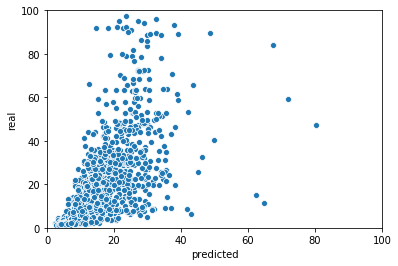

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'predicted': rs, 'real': researcher.data.test.y.flatten()})
sns.scatterplot(x="predicted", y='real', data=df)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()